In [1]:
import os
import numpy as np
import scipy.sparse
import scipy.io
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy import stats 
from scipy import * 
import numpy as np
import scanpy as sc
import pandas as pd

In [2]:
dir_path = "/home/krushna/Documents/Data_integration/SCRNA_Datasets/All_h5ad/"
def load_data(dataset,batch):
    adata =sc.read_h5ad(dir_path+dataset+'.h5ad')
    sc.pp.filter_genes(adata, min_counts=3)
    adata.layers["counts"] = adata.X.copy()
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    adata.raw = adata
    sc.pp.highly_variable_genes(
            adata,
            flavor="seurat",
            n_top_genes=2000,
            layer="counts",
            batch_key=batch,
            subset=True
    )
    return adata
batch_key_dic = {'Immune_Human' : 'batch',
                 'Lung' : 'batch',
                 'Pancreas' : 'tech',
                 'Tabula_Muris' : "batch",
                 'Human_Mouse' : 'batch',
                 'Human_Retina': "Batch"
                 
                }
cell_type_key_dic = {'Immune_Human' : 'final_annotation',
                 'Lung' : 'cell_type',
                 'Pancreas' : 'celltype',
                 "Tabula_Muris" : "cell_ontology_class",
                 'Human_Mouse' : "celltype",
                 "Human_Retina":"Subcluster"
                    }    
emb_folder = "/home/krushna/Documents/Data_integration/Othermethods/insct/embeddings/"

In [3]:
dataset = 'Immune_Human'
embeddings = 'Immune_tnn_embeddings_1510'+'.csv'
batch = batch_key_dic[dataset]
cell_type = cell_type_key_dic[dataset]
adata = load_data(dataset,batch)
emb_path = emb_folder + embeddings 
final_embedings=pd.read_csv(emb_path, sep=',',header=None).values
adata.obsm['final_embeddings'] = final_embedings

/home/krushna/Softwares/Anaconda3/envs/tf1_dra/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Clustering...
use rep: final_embeddings


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #155: KMP_AFFINITY: Initial OS proc set respected: 0-95
OMP: Info #216: KMP_AFFINITY: decoding x2APIC ids.
OMP: Info #157: KMP_AFFINITY: 96 available OS procs
OMP: Info #158: KMP_AFFINITY: Uniform topology
OMP: Info #287: KMP_AFFINITY: topology layer "LL cache" is equivalent to "socket".
OMP: Info #287: KMP_AFFINITY: topology layer "L3 cache" is equivalent to "socket".
OMP: Info #287: KMP_AFFINITY: topology layer "L2 cache" is equivalent to "core".
OMP: Info #287: KMP_AFFINITY: topology layer "L1 cache" is equivalent to "core".
OMP: Info #192: KMP_AFFINITY: 2 sockets x 24 cores/socket x 2 threads/core (48 total cores)
OMP: Info #218: KMP_AFFINITY: OS proc to physical thread map:
OMP: Info #172: KMP_AFFINITY: OS proc 0 maps to socket 0 core 0 thread 0 
OMP: Info #172: KMP_AFFINITY: OS proc 48 maps to socket 0 core 0 thread 1 
OMP: Info #172: KMP_AFFINITY: OS proc 1 maps to socket 0

0.0001 1
0.0790421052631579 10
0.15798421052631578 14
0.23692631578947368 23
0.3158684210526316 25
0.3948105263157895 28
0.47375263157894737 31
0.5526947368421052 34
0.6316368421052632 35
0.7105789473684211 38
0.789521052631579 40
0.8684631578947368 44
0.9474052631578948 44
1.0263473684210527 47
1.1052894736842105 50
1.1842315789473685 51
1.2631736842105263 61
1.3421157894736842 62
1.4210578947368422 60
1.5 61


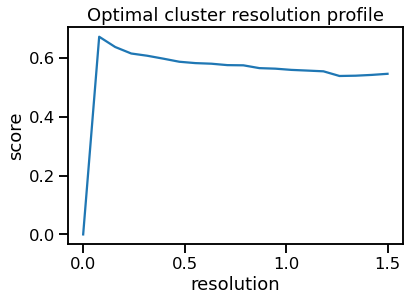

NMI...
ARI...
Silhouette score...
PC regression...
Isolated labels F1...
use rep: final_embeddings
0.0001 1
0.0790421052631579 10
0.15798421052631578 14
0.23692631578947368 23
0.3158684210526316 25
0.3948105263157895 28
0.47375263157894737 31
0.5526947368421052 34
0.6316368421052632 35
0.7105789473684211 38
0.789521052631579 40
0.8684631578947368 44
0.9474052631578948 44
1.0263473684210527 47
1.1052894736842105 50
1.1842315789473685 51
1.2631736842105263 61
1.3421157894736842 62
1.4210578947368422 60
1.5 61
use rep: final_embeddings
0.0001 1
0.0790421052631579 10
0.15798421052631578 14
0.23692631578947368 23
0.3158684210526316 25
0.3948105263157895 28
0.47375263157894737 31
0.5526947368421052 34
0.6316368421052632 35
0.7105789473684211 38
0.789521052631579 40
0.8684631578947368 44
0.9474052631578948 44
1.0263473684210527 47
1.1052894736842105 50
1.1842315789473685 51
1.2631736842105263 61
1.3421157894736842 62
1.4210578947368422 60
1.5 61
use rep: final_embeddings
0.0001 1
0.0790421052

In [4]:
import scIB
results,ilisi_all,clisi_all,kbet_all  =   scIB.metrics.metrics(                
                adata,
                adata,
                batch_key = batch, #need to change according
                label_key = cell_type, #need to change according
                hvg_score_=False,
                cluster_key='cluster',
                cluster_nmi=None,
                ari_=True,
                nmi_=True,
                nmi_method='arithmetic',
                nmi_dir=None,
                silhouette_=True,
                embed= 'final_embeddings', #need to change according 
                si_metric='euclidean',
                pcr_=True,
                cell_cycle_=False,
                organism='mouse',
                isolated_labels_=True,  # backwards compatibility
                isolated_labels_f1_=True,
                isolated_labels_asw_=True,
                n_isolated=None,
                graph_conn_=True,
                kBET_=True,
                kBET_sub=0.5,
                lisi_graph_=True,
                lisi_raw=True,
                trajectory_=False,
                type_=None,
                verbose=False,
        )

In [5]:
results

0
NMI_cluster/label          0.672193
ARI_cluster/label          0.465258
ASW_label                  0.557499
ASW_label/batch            0.721057
PCR_batch                  0.501925
cell_cycle_conservation         NaN
isolated_label_F1          0.497217
isolated_label_silhouette  0.513538
graph_conn                 0.687660
kBET                       0.266448
iLISI                      0.255398
cLISI                      0.991142
hvg_overlap                     NaN
trajectory                      NaN

In [6]:
import numpy as np
np.savetxt(dataset+"_ilisi.csv", ilisi_all, delimiter=",")
np.savetxt(dataset+"_clisi.csv", clisi_all, delimiter=",")
np.savetxt(dataset+"_kbet_all.csv",np.concatenate([np.array(val).reshape(1,-1) for val in kbet_all],axis = 0), delimiter=',')

In [7]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [8]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi


latent_matrix = adata.obsm['final_embeddings'] 
labels = np.array(adata.obs[cell_type] )
K = np.size(np.unique(labels))
kmeans = KMeans(n_clusters=K, random_state=0).fit(latent_matrix)
y_pred = kmeans.labels_

print('Computing NMI ...')
NMI = nmi(labels.flatten(), y_pred.flatten())
print('NMI = {}'.format(NMI))

Computing NMI ...
NMI = 0.6360185471149356


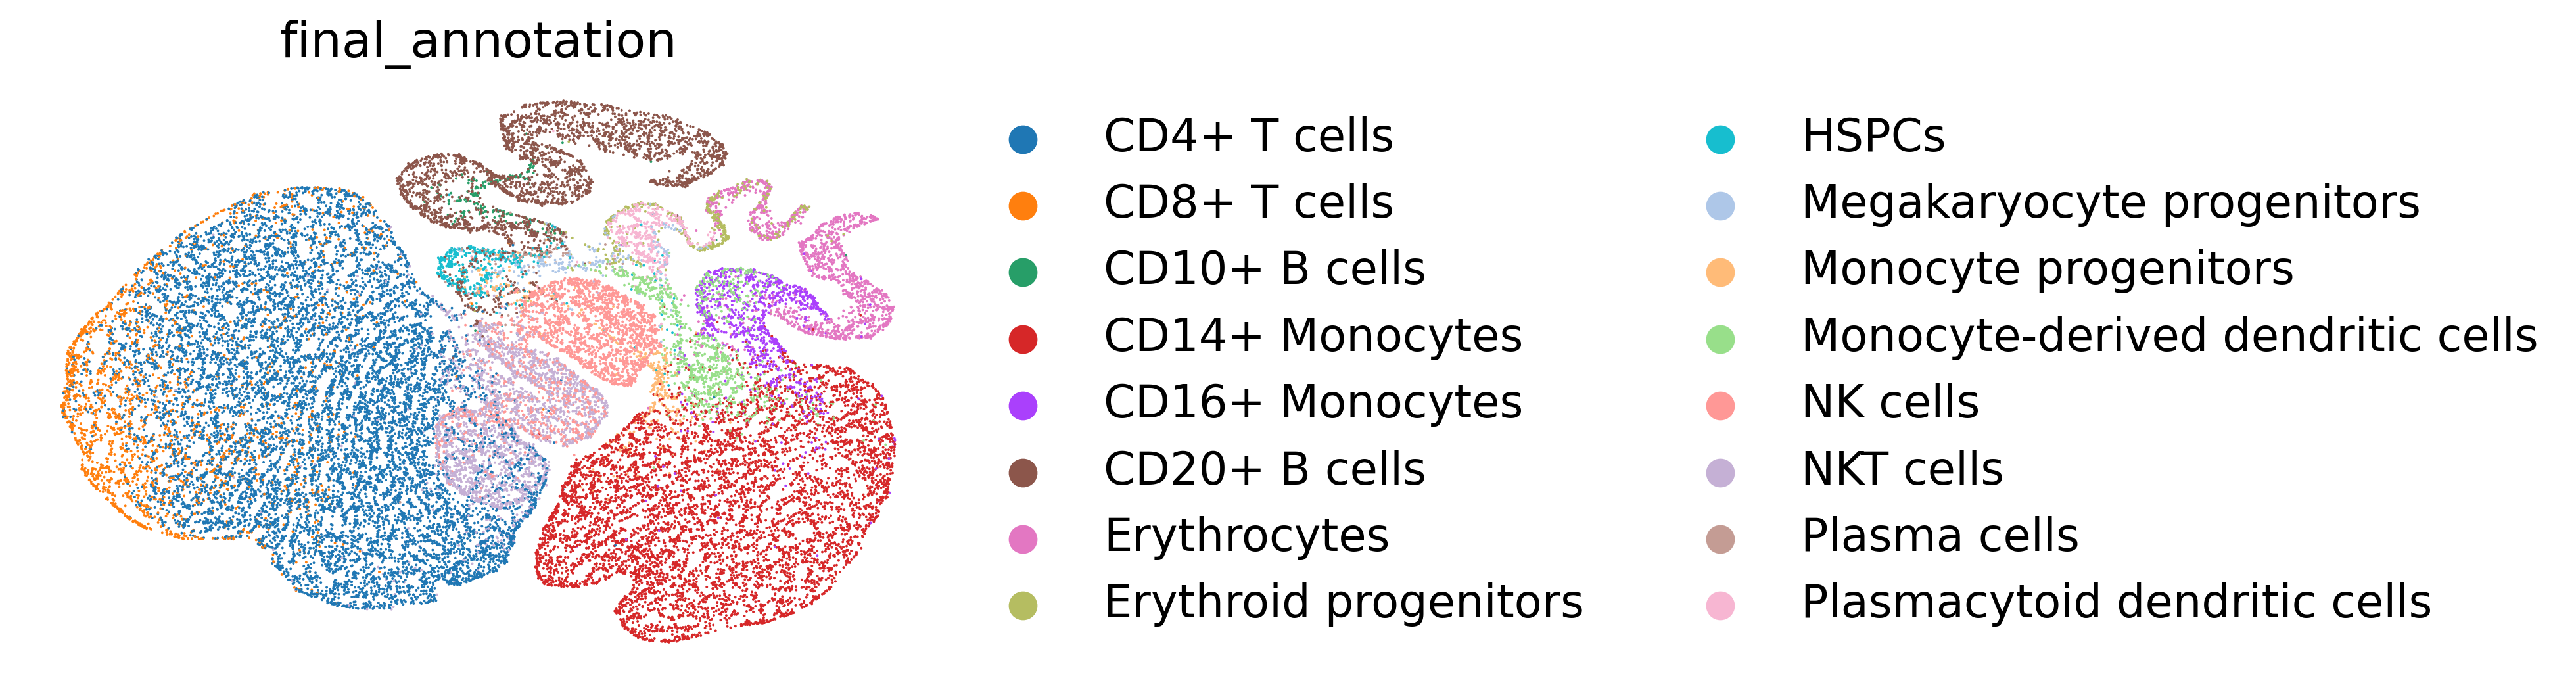

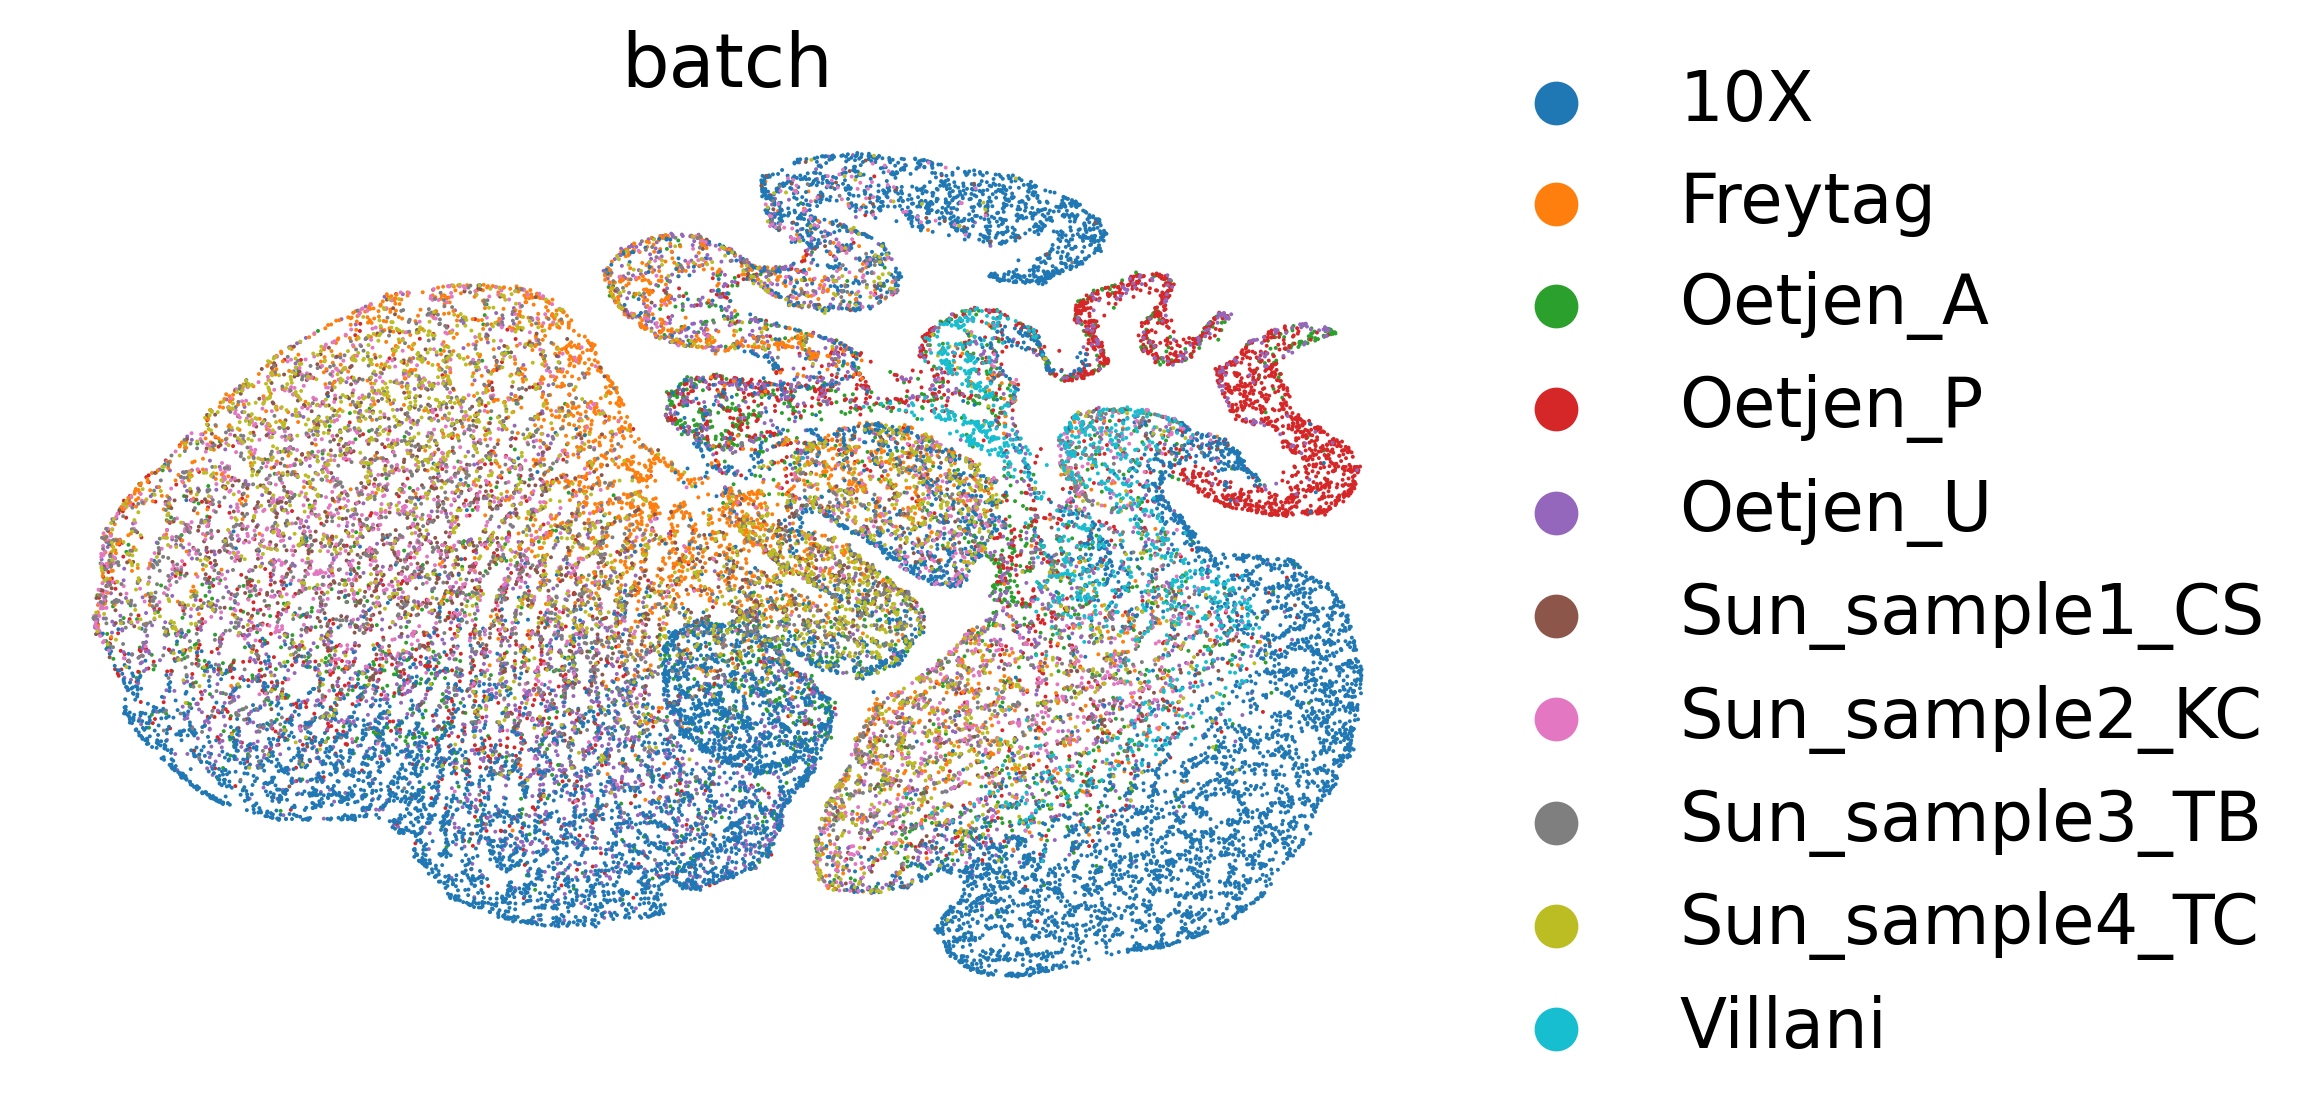

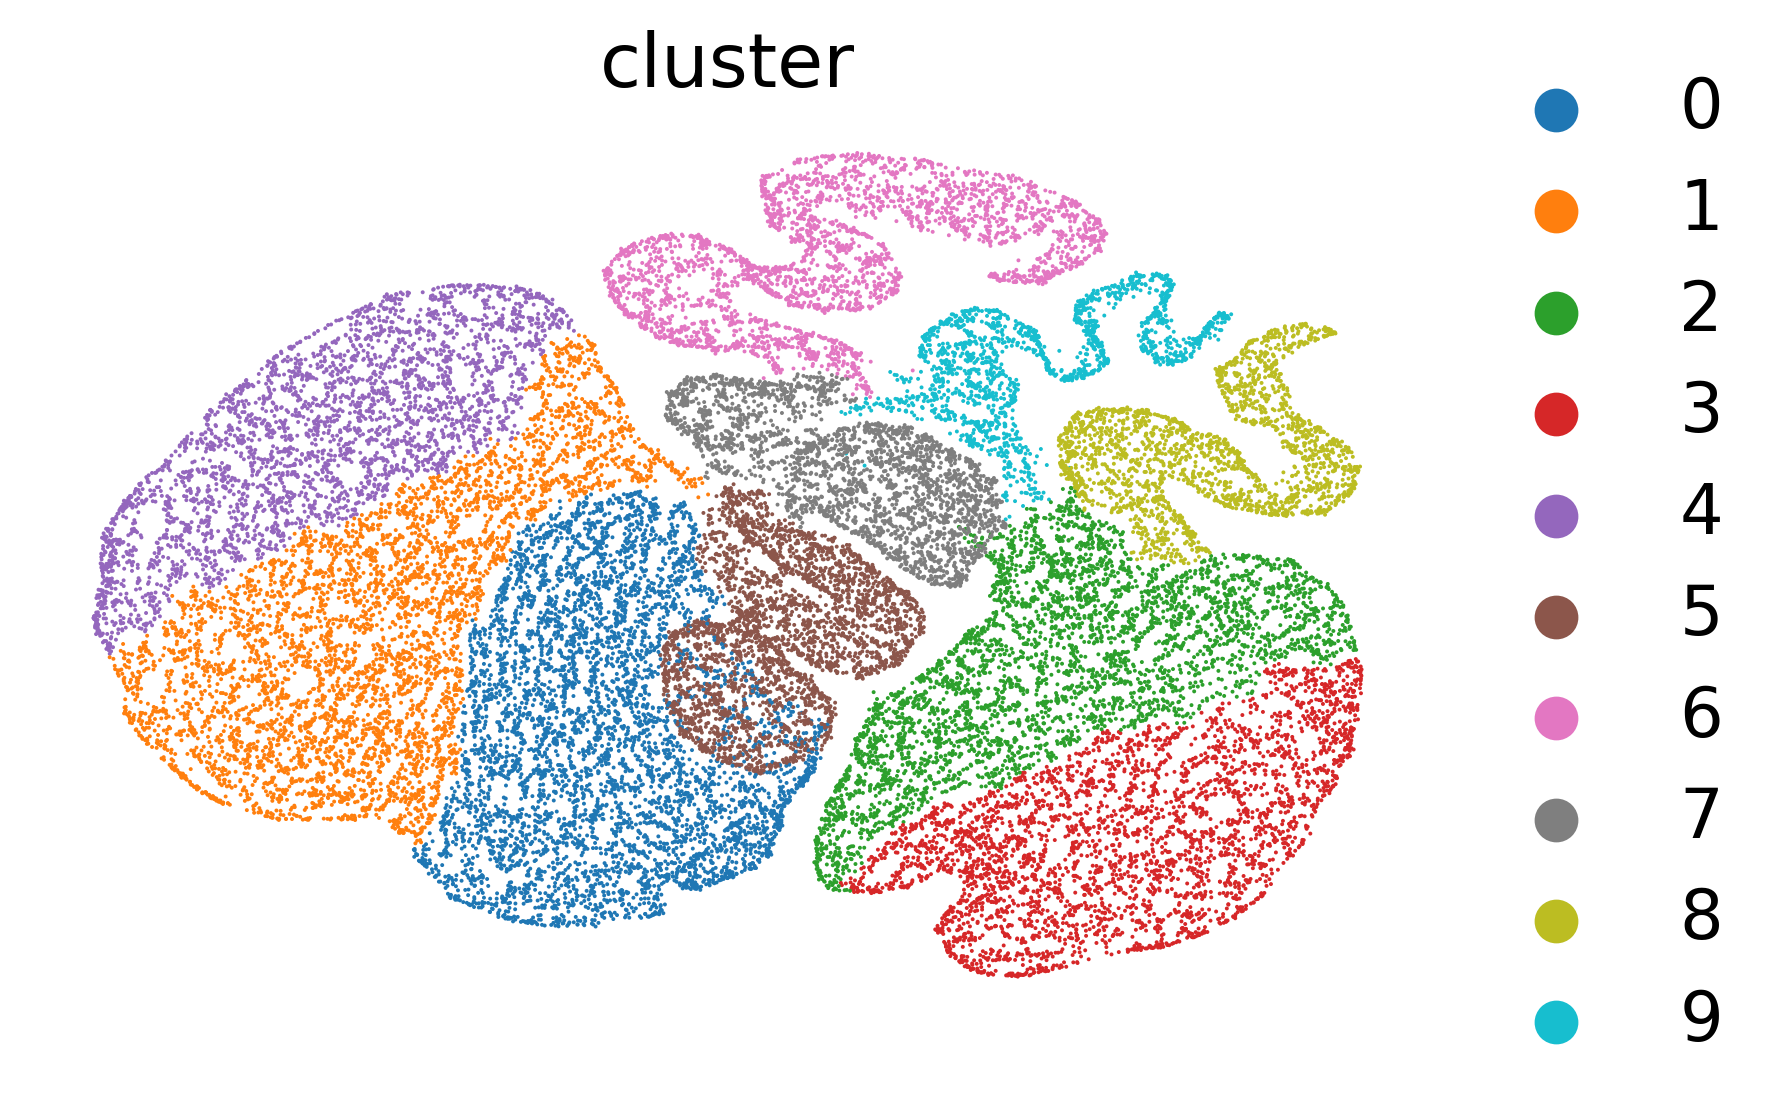

In [9]:
sc.pp.neighbors(adata, use_rep='final_embeddings')  # use_rep = 'final_embeddings'
sc.tl.umap(adata)
sc.pl.umap(adata, color=cell_type, frameon=False)
sc.pl.umap(adata, color=batch, frameon=False)
sc.pl.umap(adata, color='cluster', frameon=False)

Clustering...
use rep: final_embeddings


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #155: KMP_AFFINITY: Initial OS proc set respected: 0-95
OMP: Info #216: KMP_AFFINITY: decoding x2APIC ids.
OMP: Info #157: KMP_AFFINITY: 96 available OS procs
OMP: Info #158: KMP_AFFINITY: Uniform topology
OMP: Info #287: KMP_AFFINITY: topology layer "LL cache" is equivalent to "socket".
OMP: Info #287: KMP_AFFINITY: topology layer "L3 cache" is equivalent to "socket".
OMP: Info #287: KMP_AFFINITY: topology layer "L2 cache" is equivalent to "core".
OMP: Info #287: KMP_AFFINITY: topology layer "L1 cache" is equivalent to "core".
OMP: Info #192: KMP_AFFINITY: 2 sockets x 24 cores/socket x 2 threads/core (48 total cores)
OMP: Info #218: KMP_AFFINITY: OS proc to physical thread map:
OMP: Info #172: KMP_AFFINITY: OS proc 0 maps to socket 0 core 0 thread 0 
OMP: Info #172: KMP_AFFINITY: OS proc 48 maps to socket 0 core 0 thread 1 
OMP: Info #172: KMP_AFFINITY: OS proc 1 maps to socket 0

0.0001 1
0.0790421052631579 10
0.15798421052631578 14
0.23692631578947368 23
0.3158684210526316 25
0.3948105263157895 28
0.47375263157894737 31
0.5526947368421052 34
0.6316368421052632 35
0.7105789473684211 38
0.789521052631579 40
0.8684631578947368 44
0.9474052631578948 44
1.0263473684210527 47
1.1052894736842105 50
1.1842315789473685 51
1.2631736842105263 61
1.3421157894736842 62
1.4210578947368422 60
1.5 61


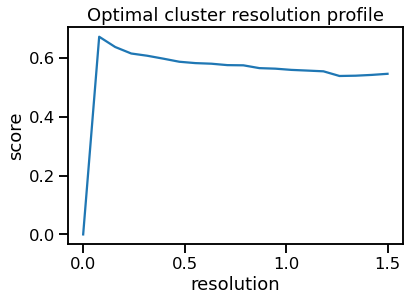

ARI...
Trajectory conservation score...


/home/krushna/Documents/Data_integration/Othermethods/insct/scIB/metrics/trajectory.py:28: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  return_labels=True


In [4]:
import scIB
results,ilisi_all,clisi_all,kbet_all  =   scIB.metrics.metrics(                
                adata,
                adata,
                batch_key = batch, #need to change according
                label_key = cell_type, #need to change according
                hvg_score_=False,
                cluster_key='cluster',
                cluster_nmi=None,
                ari_=True,
                nmi_=False,
                nmi_method='arithmetic',
                nmi_dir=None,
                silhouette_=False,
                embed= 'final_embeddings', #need to change according 
                si_metric='euclidean',
                pcr_=False,
                cell_cycle_=False,
                organism='mouse',
                isolated_labels_=False,  # backwards compatibility
                isolated_labels_f1_=False,
                isolated_labels_asw_=False,
                n_isolated=None,
                graph_conn_=False,
                kBET_=False,
                kBET_sub=0.5,
                lisi_graph_=False,
                lisi_raw=False,
                trajectory_=True,
                type_=None,
                verbose=False,
        )

In [5]:
results

0
NMI_cluster/label               NaN
ARI_cluster/label          0.465258
ASW_label                       NaN
ASW_label/batch                 NaN
PCR_batch                       NaN
cell_cycle_conservation         NaN
isolated_label_F1               NaN
isolated_label_silhouette       NaN
graph_conn                      NaN
kBET                            NaN
iLISI                           NaN
cLISI                           NaN
hvg_overlap                     NaN
trajectory                 0.517469